## Experiment 5

In this experiment we want to run different simulations on different types of ${\tt g\_funct}$
All the simulations share a lot of parameters (such as the number of epochs, the number of peers, the PoS type and so on), but they differ on the function applied to $s$ at each epoch. We remark that:
- Constant 
$$
s = k
$$
- Linear
$$
s = |s - \theta| / k
$$
- Quadratic
$$
s = |s - \theta|^2 / k
$$
We run the following five simulations:
1) Constant, $k=1 / 1000$
2) Linear, $k = 10$
3) Linear, $k = 100$
4) Quadratic, $k = 10$
5) Quadratic, $k = 100$

At first, we include all the components:

In [1]:
include("../../src/Simulator.jl")

Now we define five Parameters

In [3]:
#Generic parameters
n_epochs = 4000000
n_peers = 10000

#I create a basic set of parameters
p1 = Parameters()

#And i customize it with the ones written above
p1.n_epochs = n_epochs
p1.n_peers = n_peers
p1.n_corrupted = 50
p1.p_fail = 0.7
p1.p_join = 0.001
p1.p_leave = 0.001
p1.proof_of_stake = GiniStabilized
p1.initial_stake_volume = 50000.0
p1.initial_distribution = Gini
p1.initial_gini = 0.5
p1.join_amount = NewRandom
p1.penalty_percentage = 0.5
p1.reward = 10.0
p1.s_type = Constant
p1.k = 1 / 100.0
p1.θ = 0.3

#I create a basic set of parameters
p2 = Parameters()

#And i customize it with the ones written above
p2.n_epochs = n_epochs
p2.n_peers = n_peers
p2.n_corrupted = 50
p2.p_fail = 0.7
p2.p_join = 0.001
p2.p_leave = 0.001
p2.proof_of_stake = GiniStabilized
p2.initial_stake_volume = 50000.0
p2.initial_distribution = Gini
p2.initial_gini = 0.5
p2.join_amount = NewRandom
p2.penalty_percentage = 0.5
p2.reward = 10.0
p2.s_type = Linear
p2.k = 1 / 10.0
p2.θ = 0.3

#I create a basic set of parameters
p3 = Parameters()

#And i customize it with the ones written above
p3.n_epochs = n_epochs
p3.n_peers = n_peers
p3.n_corrupted = 50
p3.p_fail = 0.7
p3.p_join = 0.001
p3.p_leave = 0.001
p3.proof_of_stake = GiniStabilized
p3.initial_stake_volume = 50000.0
p3.initial_distribution = Gini
p3.initial_gini = 0.5
p3.join_amount = NewRandom
p3.penalty_percentage = 0.5
p3.reward = 10.0
p3.s_type = Linear
p3.k = 1 / 100.0
p3.θ = 0.3

#I create a basic set of parameters
p4 = Parameters()

#And i customize it with the ones written above
p4.n_epochs = n_epochs
p4.n_peers = n_peers
p4.n_corrupted = 50
p4.p_fail = 0.7
p4.p_join = 0.001
p4.p_leave = 0.001
p4.proof_of_stake = GiniStabilized
p4.initial_stake_volume = 50000.0
p4.initial_distribution = Gini
p4.initial_gini = 0.5
p4.join_amount = NewAverage
p4.penalty_percentage = 0.5
p4.reward = 10.0
p4.s_type = Quadratic
p4.k = 1 / 10.0
p4.θ = 0.3

#I create a basic set of parameters
p5 = Parameters()

#And i customize it with the ones written above
p5.n_epochs = n_epochs
p5.n_peers = n_peers
p5.n_corrupted = 50
p5.p_fail = 0.7
p5.p_join = 0.01
p5.p_leave = 0.01
p5.proof_of_stake = GiniStabilized
p5.initial_stake_volume = 50000.0
p5.initial_distribution = Gini
p5.initial_gini = 0.5
p5.join_amount = NewAverage
p5.penalty_percentage = 0.5
p5.reward = 10.0
p5.s_type = Quadratic
p5.k = 1 / 100.0
p5.θ = 0.3


parameters = ThreadSafeDict()
parameters[1] = p1
parameters[2] = p2
parameters[3] = p3
parameters[4] = p4
parameters[5] = p5

parameters

ThreadSafeDict{Any, Any} with 5 entries:
  5 => Parameters(4000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  4 => Parameters(4000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  2 => Parameters(4000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  3 => Parameters(4000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …
  1 => Parameters(4000000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 50, 0.7, …

Notice that we use the type `ThreadSafeDict` so that it could be possible to run all the simulations asynchronously. In order to take advantage of paralllelism, set an environment variable as (in Linux or in MacOS):

`export JULIA_NUM_THREADS=4`

Don't worry though, in case no variable is set, the experiments can be executed, but in single-thread.


In [4]:
history_collection = ThreadSafeDict()


@Threads.threads for i in 1 : length(parameters)
    history_collection[i] = simulate(generate_peers(parameters[i].n_peers, 
                        parameters[i].initial_stake_volume, 
                        parameters[i].initial_distribution, 
                        0.5), 
                            rand(1:parameters[i].n_peers, parameters[i].n_corrupted), 
                            parameters[i]);
end

We now plot the results

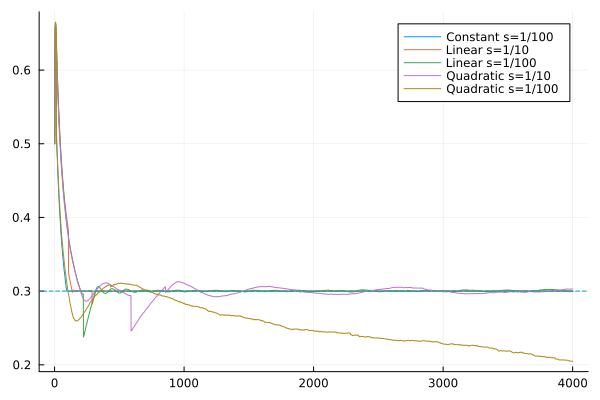

In [19]:
plot(history_collection[1][1][1:1000:end], label="Constant s=1/100")
plot!(history_collection[2][1][1:1000:end], label="Linear s=1/10")
plot!(history_collection[3][1][1:1000:end], label="Linear s=1/100")
plot!(history_collection[4][1][1:1000:end], label="Quadratic s=1/10")
plot!(history_collection[5][1][1:1000:end], label="Quadratic s=1/100")

hline!([0.3], linestyle=:dash, label="")

And export them to the `results/` folder

In [20]:
using DelimitedFiles

# Export the vector to a text file
writedlm("results/1_const.txt", history_collection[1][1][1:10000:end])
writedlm("results/2_linear_1_10.txt", history_collection[2][1][1:10000:end])
writedlm("results/3_linear_1_100.txt", history_collection[3][1][1:10000:end])
writedlm("results/4_quadratic_1_10.txt", history_collection[4][1][1:10000:end])
writedlm("results/5_quadratic_1_100.txt", history_collection[5][1][1:10000:end])